## Data Augmentations - 2d Lt Yi

In [2]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.applications import VGG16
from scipy.optimize import fmin_l_bfgs_b
import numpy as np

Using TensorFlow backend.
/home/antuser/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/antuser/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/antuser/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/antuser/.local/lib/python3.6/site-packages/tensorflow/py

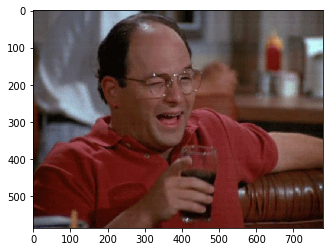

In [10]:
img = load_img('george.jpg')
data = img_to_array(img)
sample = expand_dims(data,0)
pyplot.imshow(img)

# Horizontal Shifts

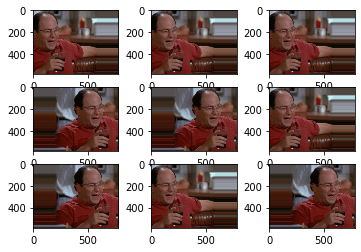

In [11]:
horzshift = ImageDataGenerator(width_shift_range=[-200,200])
it = horzshift.flow(sample,batch_size=1)
for i in range(9):
    pyplot.subplot(330+1+i)
    batch = it.next()
    image=batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

## Vertical Shifts

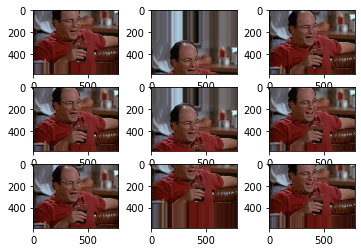

In [12]:
vertshift = ImageDataGenerator(height_shift_range = 0.5)
it = vertshift.flow(sample,batch_size=1)
for i in range(9):
    pyplot.subplot(330+1+i)
    batch = it.next()
    image=batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

## Horizontal and Vertical Flips

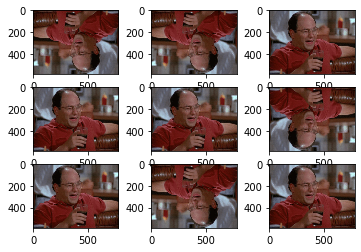

In [17]:
##STUDENT CODE
##Perform Horizontal/Vertical Flips
##Hint: Arguments are flip_horizontal and are boolean

## Random Rotations

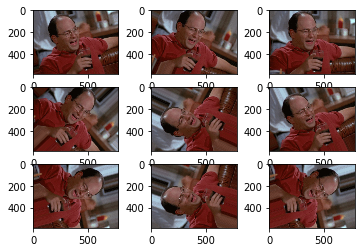

In [18]:
rotate = ImageDataGenerator(rotation_range = 90)
it = rotate.flow(sample,batch_size=1)
for i in range(9):
    pyplot.subplot(330+1+i)
    batch = it.next()
    image=batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

## Brightness Augmentations

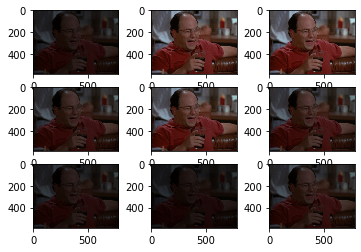

In [19]:
brightness = ImageDataGenerator(brightness_range=[0.2,1.0])
it = brightness.flow(sample,batch_size=1)
for i in range(9):
    pyplot.subplot(330+1+i)
    batch = it.next()
    image=batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

## Random Zoom

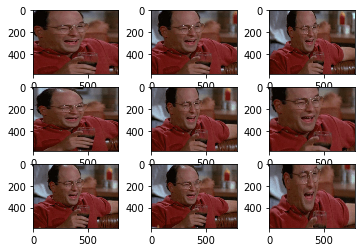

In [20]:
##STUDENT CODE -Perform random zoom using Image Data Generator
##Hint - argument is zoom_range

## Neural Style Transfer

In [4]:
cImPath = './georgesmall.jpg'
sImPath = './stylesmall.jpeg'
genImOutputPath = './output.jpg'

targetHeight = 256
targetWidth = 256
targetSize = (targetHeight, targetWidth)

cImage = load_img(path=cImPath, target_size=targetSize)
cImArr = img_to_array(cImage)
cImArr = K.variable(preprocess_input(np.expand_dims(cImArr, axis=0)), dtype='float32')

sImage = load_img(path=sImPath, target_size=targetSize)
sImArr = img_to_array(sImage)
sImArr = K.variable(preprocess_input(np.expand_dims(sImArr, axis=0)), dtype='float32')

gIm0 = np.random.randint(256, size=(targetWidth, targetHeight, 3)).astype('float64')
gIm0 = preprocess_input(np.expand_dims(gIm0, axis=0))
gImPlaceholder = K.placeholder(shape=(1, targetWidth, targetHeight, 3))

W0731 06:38:38.864357 139914823456576 deprecation_wrapper.py:119] From /home/antuser/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [5]:
def get_feature_reps(x, layer_names, model):
    """
    Get feature representations of input x for one or more layers in a given model.
    """
    featMatrices = []
    for ln in layer_names:
        selectedLayer = model.get_layer(ln)
        featRaw = selectedLayer.output
        featRawShape = K.shape(featRaw).eval(session=tf_session)
        N_l = featRawShape[-1]
        M_l = featRawShape[1]*featRawShape[2]
        featMatrix = K.reshape(featRaw, (M_l, N_l))
        featMatrix = K.transpose(featMatrix)
        featMatrices.append(featMatrix)
    return featMatrices

def get_content_loss(F, P):
    cLoss = 0.5*K.sum(K.square(F - P))
    return cLoss
def get_Gram_matrix(F):
    G = K.dot(F, K.transpose(F))
    return G
def get_style_loss(ws, Gs, As):
    sLoss = K.variable(0.)
    for w, G, A in zip(ws, Gs, As):
        M_l = K.int_shape(G)[1]
        N_l = K.int_shape(G)[0]
        G_gram = get_Gram_matrix(G)
        A_gram = get_Gram_matrix(A)
        sLoss+= w*0.25*K.sum(K.square(G_gram - A_gram))/ (N_l**2 * M_l**2)
    return sLoss
def get_total_loss(gImPlaceholder, alpha=1.0, beta=10000.0):
    F = get_feature_reps(gImPlaceholder, layer_names=[cLayerName], model=gModel)[0]
    Gs = get_feature_reps(gImPlaceholder, layer_names=sLayerNames, model=gModel)
    contentLoss = get_content_loss(F, P)
    styleLoss = get_style_loss(ws, Gs, As)
    totalLoss = alpha*contentLoss + beta*styleLoss
    return totalLoss
def calculate_loss(gImArr):
    if gImArr.shape != (1, targetWidth, targetWidth, 3):
        gImArr = gImArr.reshape((1, targetWidth, targetHeight, 3))
    loss_fcn = K.function([gModel.input], [get_total_loss(gModel.input)])
    return loss_fcn([gImArr])[0].astype('float64')

def get_grad(gImArr):
    if gImArr.shape != (1, targetWidth, targetHeight, 3):
        gImArr = gImArr.reshape((1, targetWidth, targetHeight, 3))
    grad_fcn = K.function([gModel.input], 
                          K.gradients(get_total_loss(gModel.input), [gModel.input]))
    grad = grad_fcn([gImArr])[0].flatten().astype('float64')
    return grad
def deprocess_image(x):
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, img_nrows, img_ncols))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((targetHeight, targetWidth, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [ ]:
tf_session = K.get_session()
cModel = VGG16(include_top=False, weights='imagenet', input_tensor=cImArr)
sModel = VGG16(include_top=False, weights='imagenet', input_tensor=sImArr)
gModel = VGG16(include_top=False, weights='imagenet', input_tensor=gImPlaceholder)
cLayerName = 'block4_conv2'
sLayerNames = [
                'block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                ]

P = get_feature_reps(x=cImArr, layer_names=[cLayerName], model=cModel)[0]
As = get_feature_reps(x=sImArr, layer_names=sLayerNames, model=sModel)
ws = np.ones(len(sLayerNames))/float(len(sLayerNames))

iterations = 600
x_val = gIm0.flatten()
xopt, f_val, info= fmin_l_bfgs_b(calculate_loss, x_val, fprime=get_grad,
                            maxiter=iterations, disp=True)

In [ ]:
output = deprocess_image(xopt)
pyplot.imshow(output)